# GPT2 + Fairy Tales Data + 번역

- kaggle 영어 데이터로 학습하여 생성 후 Kakao로 번역

- huggingface hub에서 계획과 일치하는 모델 발견하여 테스트 후 채택

## Install Packages

In [1]:
# !pip install transformers
# !pip install git+https://github.com/ssut/py-hanspell.git

In [ ]:
import transformers
transformers.__version__

'4.12.5'

In [ ]:
import torch
torch.__version__

'1.10.0+cu111'

In [ ]:
import nltk
nltk.__version__

'3.2.5'

In [ ]:
import requests
requests.__version__

'2.23.0'

## Save Model

1. huggingface hub에서 바로 load

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelWithLMHead
import nltk
from nltk.tokenize import sent_tokenize
import requests
from hanspell import spell_checker

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained("HScomcom/gpt2-fairytales")

model = AutoModelWithLMHead.from_pretrained("HScomcom/gpt2-fairytales").to(device)

nltk.download('punkt')

Downloading:   0%|          | 0.00/533 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/908 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/357 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:698: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Downloading:   0%|          | 0.00/2.92G [00:00<?, ?B/s]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

2. 위 실행으로 load된 tokenizer와 model 저장 후 다시 load

In [ ]:
tokenizer.save_pretrained('/content/drive/MyDrive/DOTORY/gpt2/save_pretrained/')
# model.save_pretrained('/content/drive/MyDrive/DOTORY/gpt2/save_pretrained/')

In [ ]:
learning_rate = 1e-5
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

torch.save({
    'model': model.state_dict(),
    'optimizer': optimizer.state_dict()
}, '/content/drive/MyDrive/DOTORY/gpt2/' + 'gpt2_1104.tar')

In [ ]:
# torch.save(model.state_dict(), '/content/drive/MyDrive/DOTORY/gpt2/' + 'gpt2_1104.pt')

In [ ]:
# !GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/HScomcom/gpt2-fairytales

Cloning into 'gpt2-fairytales'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 33 (delta 12), reused 0 (delta 0)
Unpacking objects: 100% (33/33), done.


In [ ]:
# !apt-get install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,129 kB of archives.
After this operation, 7,662 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 git-lfs amd64 2.3.4-1 [2,129 kB]
Fetched 2,129 kB in 1s (1,624 kB/s)
Selecting previously unselected package git-lfs.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../git-lfs_2.3.4-1_amd64.deb ...
Unpacking git-lfs (2.3.4-1) ...
Setting up git-lfs (2.3.4-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
# %cd /content/gpt2-fairytales

/content/gpt2-fairytales


In [ ]:
# !git lfs install

Updated git hooks.
Git LFS initialized.


In [ ]:
# !git lfs pull

Git LFS: (3 of 3 files) 5.80 GB / 5.80 GB


In [ ]:
# import torch
# from transformers import GPT2Tokenizer, GPT2LMHeadModel
# import nltk
# from nltk.tokenize import sent_tokenize
# import requests
# from hanspell import spell_checker

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# path = "/content/gpt2-fairytales"

# tokenizer = GPT2Tokenizer.from_pretrained(path)
# model = GPT2LMHeadModel.from_pretrained(path)
# model.to(device)

# nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Load Model & 후처리

In [ ]:
# import torch
# from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPT2Config
# import nltk
# from nltk.tokenize import sent_tokenize
# import requests
# from hanspell import spell_checker

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# path = "/content/drive/MyDrive/DOTORY/gpt2/save_pretrained/"

# tokenizer = GPT2Tokenizer.from_pretrained(path)
# model = GPT2LMHeadModel.from_pretrained(path)
# # model = GPT2LMHeadModel(GPT2Config.from_json_file(path + 'config.json'))
# model.to(device)

# nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPT2Config
import nltk
from nltk.tokenize import sent_tokenize
import requests
from hanspell import spell_checker

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
path = "/content/drive/MyDrive/DOTORY/gpt2/"
checkpoint = torch.load(path + 'gpt2_1104.tar')

tokenizer = GPT2Tokenizer.from_pretrained(path)

model = GPT2LMHeadModel(GPT2Config.from_json_file(path + 'config.json'))
model.load_state_dict(checkpoint['model'])
model.to(device)

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# papago (api key)
def translate_papago(text, source, target):
    client_id = "----ID----"
    client_secret = "----private key----"

    data = {
            'honorific': 'True',
            'source' : source,
            'target': target,
            'text' : text
            }

    url = "https://openapi.naver.com/v1/papago/n2mt"

    header = {"X-Naver-Client-Id":client_id,
              "X-Naver-Client-Secret":client_secret}

    response = requests.post(url, headers=header, data=data)
    rescode = response.status_code

    if(rescode==200):
        send_data = response.json()
        trans_data = (send_data['message']['result']['translatedText'])
        return trans_data
    else:
        print("Error Code:" , rescode)

In [4]:
# kakao (crawling)
def translate_kakao(text, source, target):
    url = "https://translate.kakao.com/translator/translate.json"

    headers = {
        "Referer": "https://translate.kakao.com/",
        "User-Agent": "Mozilla/5.0"
    }

    data = {
        "queryLanguage": source,
        "resultLanguage": target,
        "q": text
    }

    resp = requests.post(url, headers=headers, data=data)
    data = resp.json()
    output = data['result']['output'][0][0] 
    return output

In [5]:
f = open("/content/drive/MyDrive/DOTORY/gpt2/filtering.txt", 'r')
filtering = f.read().split('\n')
f.close()

## EDA

In [ ]:
# f = open("/content/drive/MyDrive/DOTORY/merged_clean.txt", 'r')
# origin = f.read().split('\n\n\n')
# origin = list(filter(None, origin))
# f.close()
# len(origin)  # fairy tales 동화 개수 (전처리하고 더 줄어들거라 예상)

1884

(1, 407)

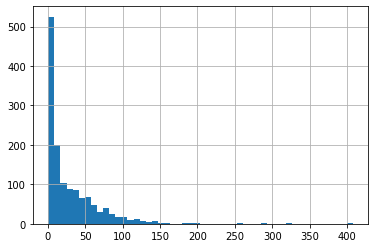

In [ ]:
import pandas as pd
import numpy as np

f = open("/content/drive/MyDrive/DOTORY/merged_clean.txt", 'r')
original = f.read().split('\n\n\n')
original = list(filter(None, original))
story_length = []
for text in original:
    stories = text.lstrip('\n').split('\n\n')[1:]
    if len(stories):story_length.append(len(stories))
f.close()
pd.Series(story_length).hist(bins=50)  # story당 문장 개수 (더 많을 수 있음)
min(story_length), max(story_length)

In [ ]:
len(story_length)

1361

(1, 20182)

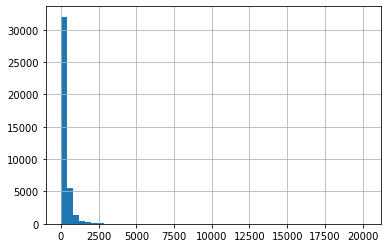

In [ ]:
sentence_length = []
for text in original:
    story = text.lstrip('\n').split('\n\n')[1:]
    for s in story:sentence_length.append(len(s))

pd.Series(sentence_length).hist(bins=50)  # 문장 길이 분포 (유사도 기반으로 문장 뽑을거면 얘가 더 중요하긴 함, 더 split)
min(sentence_length), max(sentence_length)

In [2]:
df = []
for text in original:
    stories = text.lstrip('\n').split('\n\n')[1:]
    df.extend(stories)

df[np.array(sentence_length).argmax()]  # 가장 긴 문장

In [ ]:
f = open("/content/drive/MyDrive/DOTORY/merged_clean.txt", 'r')
origin = f.read().split('\n\n\n')
origin = list(filter(None, origin))
new = []
for i in range(len(origin)):
    origin[i] = origin[i].lstrip('\n').split('\n\n')[1:]
    new.extend(origin[i])
for i in range(len(new)):
    new[i] = new[i].replace('\n', ' ')
f.close()
new

In [ ]:
len(new)  # 문장 개수 (아직 split 되지 않은 문장들이 많음)

40000

한국어 동화 데이터와 비교

In [ ]:
# df1 = open('/content/drive/MyDrive/DOTORY/동화 본문 코딩 2차.txt', 'r', encoding='cp949').read()
# df2 = open('/content/drive/MyDrive/DOTORY/tale.txt', 'r', encoding='utf-8').read()
# df = []
# for i in df1.split('\n\n\n'):
#     story = i.split('\n\n')[1].split('\n')
#     df.extend(story)
# for i in df2.split('\n\n'):
#     story = i.split('\n')
#     df.extend(story)
# len(df)  # 한국어 동화 데이터 문장 개수

36828

In [ ]:
with open('/content/drive/MyDrive/DOTORY/sentence_db.txt', 'w') as f:
    for sentence in origin:
        f.write(sentence + '\n')
f.close()

In [ ]:
f = open("/content/drive/MyDrive/DOTORY/sentence_db.txt", 'r')
sentence_db = f.read().split('\n')
f.close()

In [ ]:
len(sentence_db)

41884

In [ ]:
# # bad sentence API
# import json
# def filter_bad(text):
#     url = "https://wsapi.simsimi.com/190410/classify/bad"

#     KEY = "----private key----"

#     headers = {
#         "Content-Type": "application/json",
#         "x-api-key": KEY
#     }

#     data = {
#         "sentence": text,
#         "lang": "ko",
#         "type": "DPD"
#     }

#     response = requests.post(url, headers=headers, data=data)
#     output = response.json()
#     return output["bad"]

## Generate

In [ ]:
# result = []

# input_sentence = input('Enter the first sentence : ')
# input_sentence = translate_kakao(input_sentence, 'kr', 'en')  # papago : ko, kakao : kr

# for i in range(20):
#     encoded = torch.tensor(tokenizer.encode(input_sentence)).unsqueeze(0).to(device)
#     generated = model.generate(encoded, do_sample=True, top_p=0.9, num_return_sequences=3, max_length=200, min_length=1, temperature=0.6, pad_token_id=tokenizer.eos_token_id).to(device)  # length_penalty=10, 
#     decoded = [tokenizer.decode(generated[i]) for i in range(3)]  # decode
#     output_eng = [decoded[i].replace(input_sentence, '').lstrip(' ') for i in range(3)]  # input 중복 문장 제거
#     output_eng = [sent_tokenize(output_eng[i])[0] for i in range(3)]  # 첫 번째 문장 분리
#     output_kor = [translate_kakao(output_eng[i], 'en', 'ku') for i in range(3)]  # papgo : ko, kakao : ku (ku : 높임말 문체 in kakao)
#     output_kor = [spell_checker.check(output_kor[i]).checked for i in range(3)]  # 맞춤법 검사
#     for i in range(3):
#         print('Generated ' + str(i+1) + ' : ', output_kor[i])
#     next_idx = int(input('\nChoose the sentence number : ')) - 1
#     print('Selected sentence : ', output_kor[next_idx])
#     result.append(output_kor[next_idx])
#     input_sentence = output_eng[next_idx]


Enter the first sentence : 옛날에 한 소녀가 살고 있었어요.
Generated 1 :  내가 아는 한, 그것은 내 자리가 아닙니다.
Generated 2 :  시간을 내면 스스로 뭔가를 만들려고 해도 늦지 않습니다.
Generated 3 :  그녀는 훌륭한 예쁜 소녀였고 요정들을 위해 나가 옷을 입곤 했습니다.

Choose the sentence number : 3
Selected sentence :  그녀는 훌륭한 예쁜 소녀였고 요정들을 위해 나가 옷을 입곤 했습니다.
Generated 1 :  그녀는 올 때마다 눈처럼 흰색의 작은 검은 개가 있었고 머리에 금관을 착용했습니다.
Generated 2 :  어느 날 그녀는 성에서 멀지 않은 작은 계곡에 있었고, 너무 피곤하고 목이 마르고 개울로 내려와 작은 병에서 물을 조금 마셨습니다.
Generated 3 :  그녀는 앞치마에 꽃다발을 가지고 있었고, 그들은 그녀에게 꽃을 피우라고 가르쳤습니다.

Choose the sentence number : 2
Selected sentence :  어느 날 그녀는 성에서 멀지 않은 작은 계곡에 있었고, 너무 피곤하고 목이 마르고 개울로 내려와 작은 병에서 물을 조금 마셨습니다.
Generated 1 :  술을 마셨을 때, 그녀는 옆에 서있는 아름다운 작은 소녀를 보았고, 그녀에게 결혼할 것인지 물었습니다.
Generated 2 :  그러나 술을 마시고 나서, 그녀는 물이 그녀에게 다소 더운 것을 발견했고, 그래서 그녀는 더 많은 것을 얻기 위해 집으로 달려갔습니다.
Generated 3 :  그리고 개울을 걷는 동안 새들이 노래하는 것을들을 수 있다고 생각했습니다. 그러고 나서 그들은 어디로 가야 할지, 무엇을 해야 할지 알 수 있습니다.

Choose the sentence number : 3
Selected sentence :  그리고 개울을 걷는 동안 새들이 노래하는 것을들을 수 있다고 생각했습니다. 그러고 나서 그들은 어디로 가야 할지, 

KeyboardInterrupt: ignored

In [ ]:
# input 중복 제거 및 순서 변경
result = []

prefix = 'A sad fairy tale, the main character of the girl::  '
input_sentence = input('Enter the first sentence : ')
result.append(input_sentence)
input_sentence = prefix + translate_kakao(input_sentence, 'kr', 'en')  # papago : ko, kakao : kr

for i in range(20):
    encoded = torch.tensor(tokenizer.encode(input_sentence)).to(device)
    generated = model.generate(encoded.unsqueeze(0), do_sample=True, use_cache=True, top_p=0.9, num_return_sequences=3, max_length=200, min_length=1, temperature=0.6, pad_token_id=tokenizer.eos_token_id).to(device)  # length_penalty=10,
    generated = [generated[i][len(encoded):] for i in range(3)]  # input 중복 제거
    decoded = [tokenizer.decode(generated[i]) for i in range(3)]  # decode
    output_eng = [sent_tokenize(decoded[i])[0] for i in range(3)]  # 첫 번째 문장 분리
    output_kor = [translate_kakao(output_eng[i], 'en', 'ku') for i in range(3)]  # papgo : ko, kakao : ku (ku : 높임말 문체 in kakao)
    output_kor = [spell_checker.check(output_kor[i]).checked for i in range(3)]  # 맞춤법 검사
    for i in range(3):
        print('Generated ' + str(i+1) + ' : ', output_kor[i])
    next_idx = int(input('\nChoose the sentence number : ')) - 1
    print('Selected sentence : ', output_kor[next_idx])
    result.append(output_kor[next_idx])
    input_sentence = output_eng[next_idx]


Enter the first sentence : 옛날에 한 소녀가 살고 있었어요.
Generated 1 :  그녀는 사람들을 돕는 것을 좋아하는 친절한 소녀였습니다.
Generated 2 :  그녀는 아름답고 똑똑하고 인기가 있었습니다.
Generated 3 :  그녀는 공주였습니다.

Choose the sentence number : 1
Selected sentence :  그녀는 사람들을 돕는 것을 좋아하는 친절한 소녀였습니다.
Generated 1 :  그녀는 항상 저를 도와주는 것을 기뻐했습니다.
Generated 2 :  그녀는 좋은 어머니였고, 그녀는 항상 아이들을 위해 거기에 있었습니다.
Generated 3 :  "왜 그렇게 놀랐는지 모르겠어요."라고 그녀는 말했습니다.

Choose the sentence number : 2
Selected sentence :  그녀는 좋은 어머니였고, 그녀는 항상 아이들을 위해 거기에 있었습니다.
Generated 1 :  나는 그녀가 매우 자랑스럽다"고 말 했습니다.
Generated 2 :  그녀는 좋은 어머니였습니다.
Generated 3 :  그녀는 아이들과 매우 잘 어울렸습니다.

Choose the sentence number : 3
Selected sentence :  그녀는 아이들과 매우 잘 어울렸습니다.
Generated 1 :  그녀는 좋은 어머니였습니다.
Generated 2 :  그녀는 남편과 아주 잘 지내고 있었습니다.
Generated 3 :  그녀는 친구들과 잘 지내고 있었습니다.

Choose the sentence number : 2
Selected sentence :  그녀는 남편과 아주 잘 지내고 있었습니다.
Generated 1 :  그녀는 아이들에게 매우 잘해주었습니다.
Generated 2 :  그는 "남편과 좋은 관계를 맺었다"고 말 했습니다.
Generated 3 :  "그녀는 남편과 매우 잘 어울렸습니다.

Choose the sentence number : 1


KeyboardInterrupt: ignored

In [ ]:
# filtering code 추가
result = []

input_sentence = input('Enter the first sentence : ')
result.append(input_sentence)
input_sentence = translate_kakao(input_sentence, 'kr', 'en')  # papago : ko, kakao : kr

for i in range(20):
    encoded = torch.tensor(tokenizer.encode(input_sentence)).to(device)
    generated = model.generate(encoded.unsqueeze(0), do_sample=True, use_cache=True, top_p=0.9, num_return_sequences=3, max_length=200, min_length=1, temperature=0.6, pad_token_id=tokenizer.eos_token_id).to(device)  # length_penalty=10,
    generated = [generated[i][len(encoded):] for i in range(3)]  # input 중복 제거
    decoded = [tokenizer.decode(generated[i]) for i in range(3)]  # decode
    output_eng = [sent_tokenize(decoded[i])[0] for i in range(3)]  # 첫 번째 문장 분리
    output_kor = [translate_kakao(output_eng[i], 'en', 'ku') for i in range(3)]  # papgo : ko, kakao : ku (ku : 높임말 문체 in kakao)
    output_kor = [spell_checker.check(output_kor[i]).checked for i in range(3)]  # 맞춤법 검사
    for i in range(3):
        if sum([f in output_kor[i] for f in filtering]):  # filter it and new generate
            generated = model.generate(encoded.unsqueeze(0), do_sample=True, use_cache=True, top_p=0.9, num_return_sequences=1, max_length=200, min_length=1, temperature=0.6, pad_token_id=tokenizer.eos_token_id).to(device)
            generated = generated[0][len(encoded):]
            decoded = tokenizer.decode(generated)
            output_eng[i] = sent_tokenize(decoded)[0]
            output_kor[i] = translate_kakao(output_eng[i], 'en', 'ku')
            output_kor[i] = spell_checker.check(output_kor[i]).checked
        print('Generated ' + str(i+1) + ' : ', output_kor[i])
    next_idx = int(input('\nChoose the sentence number : ')) - 1
    print('Selected sentence : ', output_kor[next_idx])
    result.append(output_kor[next_idx])
    input_sentence = output_eng[next_idx]


Enter the first sentence : 옛날에 한 소녀가 살고 있었어요.
Generated 1 :  그녀는 예쁘고, 얌전했으며, 이마 한가운데에 금별이 있었습니다.
Generated 2 :  그녀는 좋은 아이였지만, 멍청하고, 말하지 않았습니다.
Generated 3 :  그녀는 매력적이었습니다!

Choose the sentence number : 1
Selected sentence :  그녀는 예쁘고, 얌전했으며, 이마 한가운데에 금별이 있었습니다.
Generated 1 :  늙은 왕은 딸과 함께 갔는데, 의붓어머니는 알고 보니 딸에게 아름다운 소녀가 누구인지 물어보라고 했습니다.
Generated 2 :  노파는 아내와 함께 떠났고 벼룩과 그라 쇼퍼는 그와 동행했습니다.
Generated 3 :  왕은 그녀에게 그녀가 누구인지 물었습니다.


KeyboardInterrupt: ignored

In [6]:
# previous encode cat
result = []

input_sentence = input('Enter the first sentence : ')
result.append(input_sentence)
input_sentence = translate_kakao(input_sentence, 'kr', 'en')  # papago : ko, kakao : kr
encoded = torch.LongTensor().to(device)

for i in range(20):
    encoded = torch.cat([encoded, torch.tensor(tokenizer.encode(input_sentence)).to(device)])
    print('Length of encoded:', len(encoded))
    generated = model.generate(encoded.unsqueeze(0), do_sample=True, use_cache=True, top_p=0.9, num_return_sequences=3, max_length=len(encoded)+100, min_length=len(encoded), temperature=0.6, pad_token_id=tokenizer.eos_token_id).to(device)  # length_penalty=10,
    generated = [generated[i][len(encoded):] for i in range(3)]  # input 중복 제거
    decoded = [tokenizer.decode(generated[i]) for i in range(3)]  # decode
    output_eng = [sent_tokenize(decoded[i])[0] for i in range(3)]  # 첫 번째 문장 분리, kakao 번역이 문장 단위로 잘라주기 때문에 translate_kakao에 decodede 그대로 들어감. 얘는 그저 output_eng를 위함
    output_kor = [translate_kakao(decoded[i], 'en', 'ku') for i in range(3)] # papgo : ko, kakao : ku (ku : 높임말 문체 in kakao)
    output_kor = [spell_checker.check(output_kor[i]).checked for i in range(3)]  # 맞춤법 검사
    for i in range(3):
        if sum([f in output_kor[i] for f in filtering]):  # filter it and new generate
            generated = model.generate(encoded.unsqueeze(0), do_sample=True, use_cache=True, top_p=0.9, num_return_sequences=1, max_length=len(encoded)+100, min_length=len(encoded), temperature=0.6, pad_token_id=tokenizer.eos_token_id).to(device)
            generated = generated[0][len(encoded):]
            decoded = tokenizer.decode(generated)
            output_eng[i] = sent_tokenize(decoded)[0]
            output_kor[i] = translate_kakao(output_eng[i], 'en', 'ku')
            output_kor[i] = spell_checker.check(output_kor[i]).checked
        print('Generated ' + str(i+1) + ' : ', output_kor[i])
    next_idx = int(input('\nChoose the sentence number : ')) - 1
    print('Selected sentence : ', output_kor[next_idx])
    result.append(output_kor[next_idx])
    input_sentence = output_eng[next_idx]


Enter the first sentence : 옛날에 노래하기를 좋아하는 소녀가 살고 있었어요.
Length of encoded: 13
Generated 1 :  그녀는 모든 것이 그렇게 달랐던 좋은 옛날과 오래된 성이 경이로웠을 때를 노래했습니다.
Generated 2 :  그녀는 집에 앉아 노래를 부르곤 했고, 모든 사람들은 '정말 아름다운 목소리!'라고 말했습니다.
Generated 3 :  그녀는 스코틀랜드를 노래하고, 왕의 아들의 탄생을 노래했으며, 그의 행복과 그의 화려함을 노래했습니다.

Choose the sentence number : 2
Selected sentence :  그녀는 집에 앉아 노래를 부르곤 했고, 모든 사람들은 '정말 아름다운 목소리!'라고 말했습니다.
Length of encoded: 34
Generated 1 :  하지만 지금은 모두 죽었습니다. 아버지와 어머니는 죽었고, 어린아이들은 사라졌습니다.
Generated 2 :  하지만 항상 같은 노래였어요.
Generated 3 :  하지만 그녀의 말을 들은 사람은 그녀의 아버지였고, 그는 그녀에게 세상으로 나가고 싶지 않거나 결혼하고 싶지 않냐고 물었습니다.

Choose the sentence number : 2
Selected sentence :  하지만 항상 같은 노래였어요.
Length of encoded: 42
Generated 1 :  멜로디만 바뀌었어요.
Generated 2 :  소녀는 계속했고, 노인은 그녀를 따라갔습니다. 어느 날 폭우가 내렸습니다.
Generated 3 :  그래서 그녀는 전장에 가서 노래를 부르고 행복하고 의기양양했습니다.

Choose the sentence number : 1
Selected sentence :  멜로디만 바뀌었어요.
Length of encoded: 51
Generated 1 :  거리에는 다른 사람들보다 더 잘 부르는 사람이 있었습니다.
Generated 2 :  오늘의 노래는 훨씬 더 감동적이었고, 그것에 대해

KeyboardInterrupt: ignored

In [9]:
with open('/content/drive/MyDrive/DOTORY/gpt2/gpt2_result.txt', 'w') as f:
    for sentence in result:
        f.write(sentence + '\n')
f.close()

similarity 혼합

In [ ]:
# first_db, last_db
import pandas as pd
import tensorflow_hub as hub

f = open("/content/drive/MyDrive/DOTORY/merged_clean.txt", 'r')
total_db = f.read().split('\n\n\n')
total_db = list(filter(None, total_db))
first_db = []
last_db = []
for i in range(len(total_db)):
    total_db[i] = total_db[i].lstrip('\n').split('\n\n')[1:]
    if total_db[i]:  # 문장 길이 보고 더 split 전처리 필요
        first_db.append(total_db[i][0])
        last_db.append(total_db[i][-2:])
f.close()
last_db = pd.DataFrame(last_db, columns=['last-1', 'last'])

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
use = hub.load(module_url)
def embed(input):
    return use(input)

last_embed = embed(last_db['last-1'])

In [ ]:
# select first & last from DB
import random
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

result = []

first_sentence = random.choice(first_db)
input_sentence = '' + first_sentenceㅣ
first_sentence = translate_kakao(first_sentence, 'en', 'ku')  # papago : ko, kakao : kr
print('First sentence : ', first_sentence)
result.append(first_sentence)
encoded = torch.LongTensor().to(device)

for i in range(9):
    encoded = torch.cat([encoded, torch.tensor(tokenizer.encode(input_sentence)).to(device)])
    print('Length of encoded:', len(encoded))
    generated = model.generate(encoded.unsqueeze(0), do_sample=True, use_cache=True, top_p=0.9, num_return_sequences=3, max_length=len(encoded)+100, min_length=len(encoded), temperature=0.6, pad_token_id=tokenizer.eos_token_id).to(device)  # length_penalty=10,
    generated = [generated[i][len(encoded):] for i in range(3)]  # input 중복 제거
    decoded = [tokenizer.decode(generated[i]) for i in range(3)]  # decode
    output_eng = [sent_tokenize(decoded[i])[0] for i in range(3)]  # 첫 번째 문장 분리, kakao 번역이 문장 단위로 잘라주기 때문에 translate_kakao에 decodede 그대로 들어감. 얘는 그저 output_eng를 위함
    output_kor = [translate_kakao(decoded[i], 'en', 'ku') for i in range(3)] # papgo : ko, kakao : ku (ku : 높임말 문체 in kakao)
    output_kor = [spell_checker.check(output_kor[i]).checked for i in range(3)]  # 맞춤법 검사
    for i in range(3):
        if sum([f in output_kor[i] for f in filtering]):  # filter it and new generate
            generated = model.generate(encoded.unsqueeze(0), do_sample=True, use_cache=True, top_p=0.9, num_return_sequences=1, max_length=len(encoded)+100, min_length=len(encoded), temperature=0.6, pad_token_id=tokenizer.eos_token_id).to(device)
            generated = generated[0][len(encoded):]
            decoded = tokenizer.decode(generated)
            output_eng[i] = sent_tokenize(decoded)[0]
            output_kor[i] = translate_kakao(output_eng[i], 'en', 'ku')
            output_kor[i] = spell_checker.check(output_kor[i]).checked
        print('Generated ' + str(i+1) + ' : ', output_kor[i])
    next_idx = int(input('\nChoose the sentence number : ')) - 1
    print('Selected sentence : ', output_kor[next_idx])
    result.append(output_kor[next_idx])
    input_sentence = output_eng[next_idx]

last_generated = embed(pd.Series(input_sentence))
similarity = cosine_similarity(last_generated, last_embed)[0]
last_sentence = last_db['last'][np.argmax(similarity)]
last_sentence_kor = translate_kakao(last_sentence, 'en', 'ku')
print('Selected last sentence : ', last_sentence_kor)

First sentence :  어느 날 해질 무렵, 마침내 욕망이 너무 따뜻해져서 그는 생각했습니다.
Length of encoded: 93
Generated 1 :  “들어와요, 젊은 친구.” 노인이 말했다.
Generated 2 :  “들어와요, 젊은 친구.” 노인이 말했다.
Generated 3 :  “들어와요, 젊은 친구.” 노인이 말했다.

Choose the sentence number : 1
Selected sentence :  “들어와요, 젊은 친구.” 노인이 말했다.
Length of encoded: 106
Generated 1 :  '우리 집은 크지 않지만 낯선 사람을 안아줄 만큼 큰 집'입니다.
Generated 2 :  '우리 집은 크지 않지만 낯선 사람을 안아줄 만큼 큰 집'입니다.
Generated 3 :  '우리 집은 크지 않지만 낯선 사람을 안아줄 만큼 큰 집'입니다.

Choose the sentence number : 1
Selected sentence :  '우리 집은 크지 않지만 낯선 사람을 안아줄 만큼 큰 집'입니다.
Length of encoded: 123
Generated 1 :  왕자가 들어와서 노인이 식탁에 가는 동안 그는 고개를 숙이고 수염을 쓰다듬으며 '내가 그런 왕자가 되고 싶은 마음이 얼마나 많은가'라고 생각했습니다.
Generated 2 :  여행자가 들어와서 노인이 열쇠를 돌리는 동안 그에게 말했습니다. '이봐요, 내 좋은 친구, 이 어둡고 음산한 곳에서 무슨 일이 있었습니까?'
Generated 3 :  젊은이가 노크를 하자, 노인이 물었습니다. '당신은 낯선 사람입니까, 내 좋은 친구입니까?'

Choose the sentence number : 1
Selected sentence :  왕자가 들어와서 노인이 식탁에 가는 동안 그는 고개를 숙이고 수염을 쓰다듬으며 '내가 그런 왕자가 되고 싶은 마음이 얼마나 많은가'라고 생각했습니다.
Length of encoded: 163
Generated 1 : 

## Etc

In [ ]:
input_sentence = input('Enter the first sentence : ')
input_sentence = translate_kakao(input_sentence, 'kr', 'en')  # papago : ko, kakao : kr

encoded = torch.tensor(tokenizer.encode(input_sentence)).to(device)
generated = model.generate(encoded.unsqueeze(0), do_sample=True, use_cache=True, top_p=0.9, num_return_sequences=1, max_length=1000, min_length=1, temperature=0.6, pad_token_id=tokenizer.eos_token_id).to(device)  # length_penalty=10,
generated = generated[0][len(encoded):]  # input 중복 제거
decoded = tokenizer.decode(generated)  # decode
output = translate_kakao(decoded, 'en', 'ku')
output

['그녀는 제가 본 것 중 가장 예쁜 사람이었습니다. 그녀는 너무 아름답고 부드러웠습니다.',
 '남편을 잃은 슬픔이 없고, 3개월 동안 매일 단식을 했습니다.',
 '먹을 음식이 없어서 매일 밤 불가사의한 물소 가죽 더미에 누워있었습니다.',
 '좋은 신이 그녀를 돕지 않았다면 그녀는 죽었을 것입니다.',
 "숨진 날, 소녀는 이미 검은 옷을 입고 있었고, 관에 누워있을 때, 그녀는 '친애하는 신부, 두려워하지 마십시오.",
 '당신을 해치지 않을 거예요.',
 "당신과 함께 시골로 가서 안전하게 집으로 데려다 줄게요.'",
 "그리고 신부는 '브라이드, 나는 당신을 아버지 신에게 비난합니다. 당신은 악이나 선이든 누구든 해를 끼치 지 않을 것입니다.",
 "그럼 막대기를 모아서 불을 지르고 남편에게 데려오세요.'",
 "그래서 그녀는 숲으로 들어가서 불에 타면 '브라이드, 오늘 당신을 위해 좋은 식사를 하고 싶습니다.",
 '옥수수 한 봉지를 가져오면 가져올게요.”',
 '그녀는 즉시 돌아와 옥수수 가방을 관 아래에 놓고 세게 흔들었습니다.',
 "그것이 끝나자 그녀는 '이제 가서 다른 것을 가져와, 나를 위해'라고 말했습니다.",
 '다음 순간, 관 밑에 또 다른 가방을 넣고 옥수수를 넣습니다.',
 '마녀가 도망쳤습니다. "이제 가서 옥수수를 우리 집으로 가져갑니다."라고 그녀는 말했습니다.',
 '“이제 가서 남편을 데려와요.”',
 '그래서 소녀는 정오 전과 정오 같았고, 정오에는 또 다른 가방이 관 아래에 있었고 옥수수는 사라졌습니다.',
 "마녀는 불을 지르고 '브라이드, '친애하는 신부, 두려워하지 마십시오.",
 '나한테 해를 끼치지 않을 거예요. 당신과 함께 있을 거예요. 하지만 안심해요.',
 '하지만 해질 무렵에 당신은 우리 집에 가서 정부에게 제가 마녀, 사악한 마녀, 그리고 일년 내내 교활하고 사악하다고 말해야 합니다.',
 '그녀는 대답했고, 1년 동안, 그리고 하루도 채 안되었습니다.',
 '혼자 먹으면 제가 먹을게요.',
 '적

1. papago api(유료만 높임말 가능) or kakao crawling/api(모두 높임말 가능)
2. sentence split이 잘 안되는 것 같은게 sent_tokenize의 문제가 아니라 문장기호 번역이 잘 안되는듯
3. 동화에 적합하지 않은 단어 필터링하는 사전 만들어야 할듯

In [ ]:
output_eng[0]  # 번역 전 영어 문장

'Now this girl had a hungered and thirsty daughter, and it came to her ears that there was a man living in the forest who would give her anything she wanted.'

In [ ]:
translate_papago(output_eng[0], 'en', 'ko') # papago 무료 api (높임말 X)

'그런데 이 여자아이는 목이 말라 비틀거리는 딸을 낳았는데, 그 여자아이의 귀에 한 남자가 와서, 자기가 원하는 것은 무엇이든지 줄 수 있는 숲에 살고 있었다.'

In [ ]:
translate_kakao(output_eng[0], 'en', 'ku') # kakao crawling (높임말 O)

'이제 그녀는 굶주리고 목이 마르고 딸을 낳았고, 숲에 살고 있는 남자가 원하는 것을 줄 것이라는 것이 그녀의 귀에 나타났습니다.'

In [ ]:
translate_kakao(output_eng[0], 'en', 'kr') # kakao crawling (높임말 X)

'이제 이 소녀는 굶주리고 목마른 딸을 낳았고, 숲에 살고 있는 한 남자가 그녀에게 원하는 것은 무엇이든 줄 것이라는 것이 그녀의 귀에 떠올랐다.'